## Crime Rate Prediction using Decision Tree 

In [1]:
#import librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
plt.style.use('ggplot')
import seaborn as sns

In [2]:
#reading the data
df = pd.read_csv('Standard Metropolitan Areas Data - train_data - data.csv')
df.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   land_area       99 non-null     int64  
 1   percent_city    99 non-null     float64
 2   percent_senior  99 non-null     float64
 3   physicians      99 non-null     int64  
 4   hospital_beds   99 non-null     int64  
 5   graduates       99 non-null     float64
 6   work_force      99 non-null     float64
 7   income          99 non-null     int64  
 8   region          99 non-null     int64  
 9   crime_rate      99 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 7.9 KB


Our dataset has 99 rows and 10 columns. With 5 columns having float datatype and other 5 columns having int datatype. And our dataset has no missing values.

In [4]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

crime_rate        0.0
region            0.0
income            0.0
work_force        0.0
graduates         0.0
hospital_beds     0.0
physicians        0.0
percent_senior    0.0
percent_city      0.0
land_area         0.0
dtype: float64

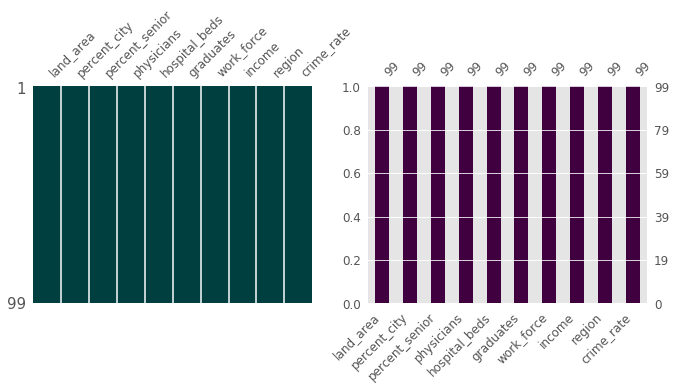

In [5]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
msno.matrix(df, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(df, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

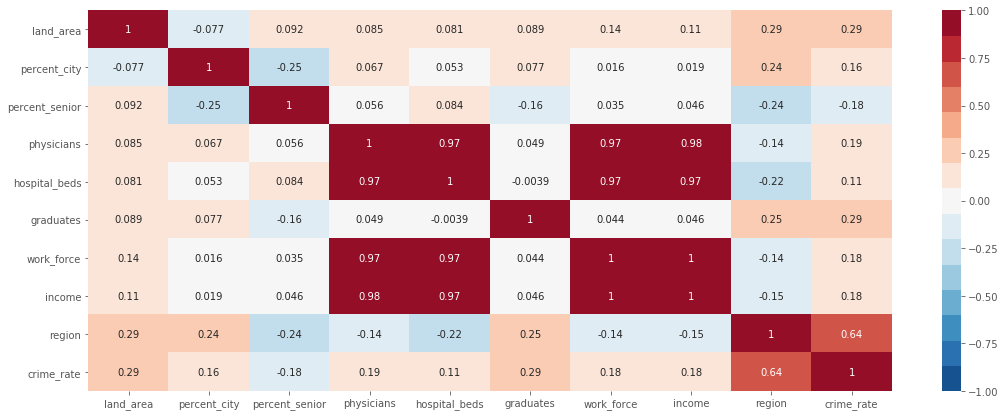

In [6]:
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(method='pearson'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

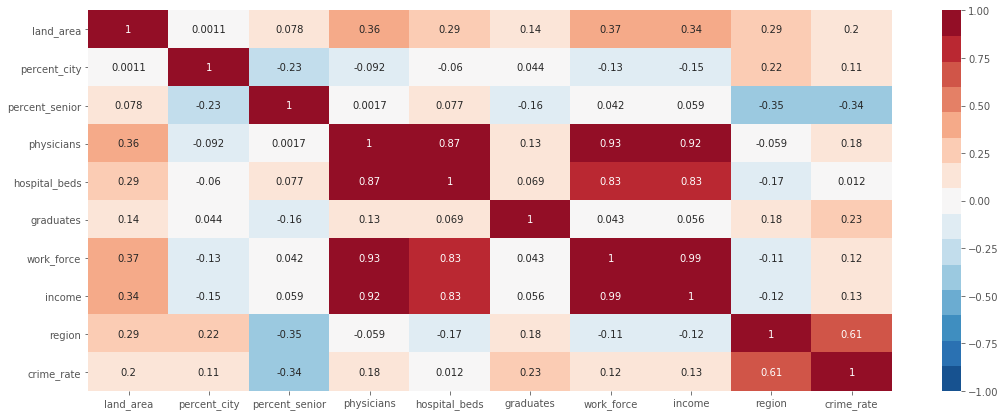

In [7]:
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(method='spearman'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

In [8]:
df.columns

Index(['land_area', 'percent_city', 'percent_senior', 'physicians',
       'hospital_beds', 'graduates', 'work_force', 'income', 'region',
       'crime_rate'],
      dtype='object')

In [9]:
#cols_to_keep = ['land_area', 'percent_senior', 'graduates', 'region','crime_rate']
cols_to_keep = [ 'percent_senior','region','crime_rate']
new_df = df[cols_to_keep]

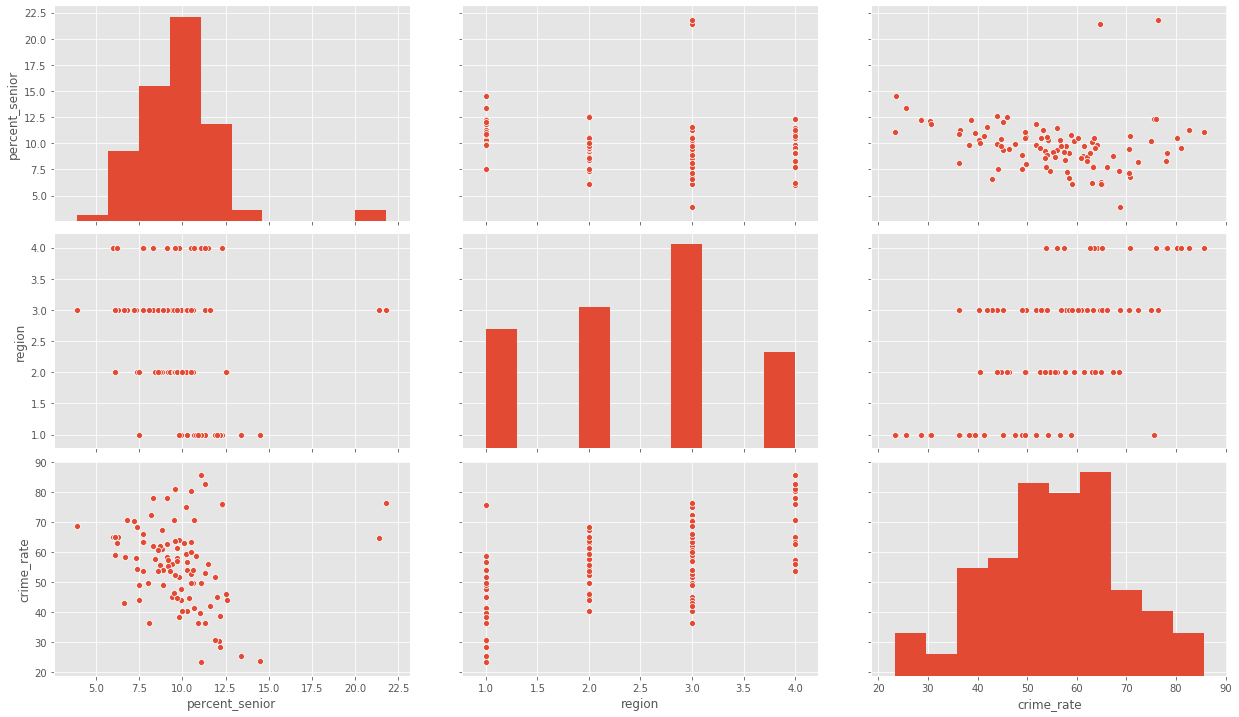

In [10]:
g = sns.pairplot(new_df)
g.fig.set_size_inches(18, 10)
plt.show()

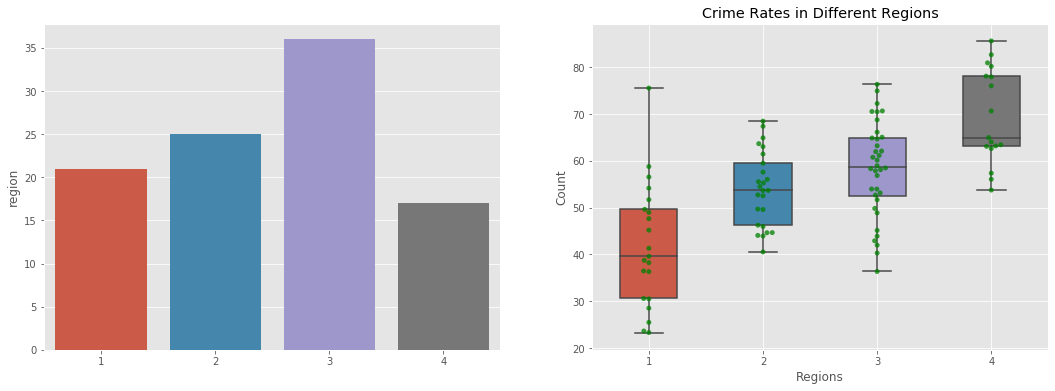

In [11]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

plt.grid(True)

sns.barplot(ax=ax1, x=df['region'].value_counts().index, y=df['region'].value_counts())


# plot boxplot with seaborn
sns.boxplot(ax = ax2, y='crime_rate', x='region', 
                 data=new_df, 
                 width=0.5)


# add swarmplot
sns.swarmplot(ax = ax2, y='crime_rate', x='region', 
                 data=new_df, 
              color='green',
              alpha=0.75)

plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Crime Rates in Different Regions')
plt.grid(True)

Our mission is to predict crime_rate and it seems region plays importance on the rate of crime.

Lets build a DecisionTreeRegressor model

In [12]:
X = new_df.drop('crime_rate', axis = 1)
y = new_df['crime_rate']

# Splitting train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
# We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor
#Input=[('scale', StandardScaler()), ('model', DecisionTreeRegressor())]

# we input the list as an argument to the pipeline constructor
pipe = DecisionTreeRegressor()

# We can normalize the data, perform a transform and fit the model simultaneously
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

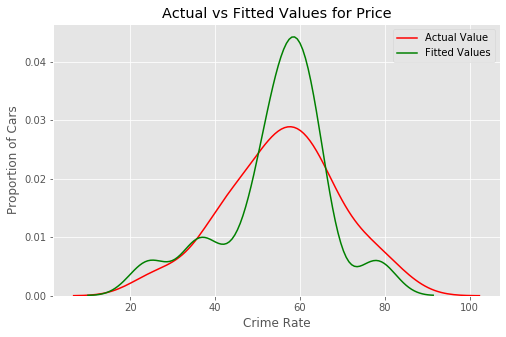

In [14]:
plt.figure(figsize = (8, 5))

ax1 = sns.distplot(new_df['crime_rate'], hist = False, color = "r", label = "Actual Value")
sns.distplot(y_pred, hist = False, color = "g", label = "Fitted Values" , ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Crime Rate')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [15]:
from sklearn.metrics import mean_squared_error

# Find the R^2
print('The score of the train set is: ', pipe.score(X_train, y_train))
print('The score of the test set is: ', pipe.score(X_test, y_test))

train_predictions = pipe.predict(X_train)
test_predictions = pipe.predict(X_test)

train_mse = mean_squared_error(train_predictions, y_train)
test_mse = mean_squared_error(y_pred, y_test)

print('---------------------------------------------------')
print('The MSE of the train set is: ', train_mse)
print('The MSE of the test set is: ', test_mse)

The score of the train set is:  0.9613524076952555
The score of the test set is:  -0.045860964986781154
---------------------------------------------------
The MSE of the train set is:  8.134409420289858
The MSE of the test set is:  108.42381416666666


In [16]:
from sklearn.metrics import r2_score

print("R2-score of the train set: %.2f" % r2_score(train_predictions, y_train))
print("R2-score of the predicted result: %.2f" % r2_score(y_pred, y_test))

R2-score of the train set: 0.96
R2-score of the predicted result: 0.31


In [17]:
#visualize our model prediction
from sklearn.tree import export_graphviz
import graphviz

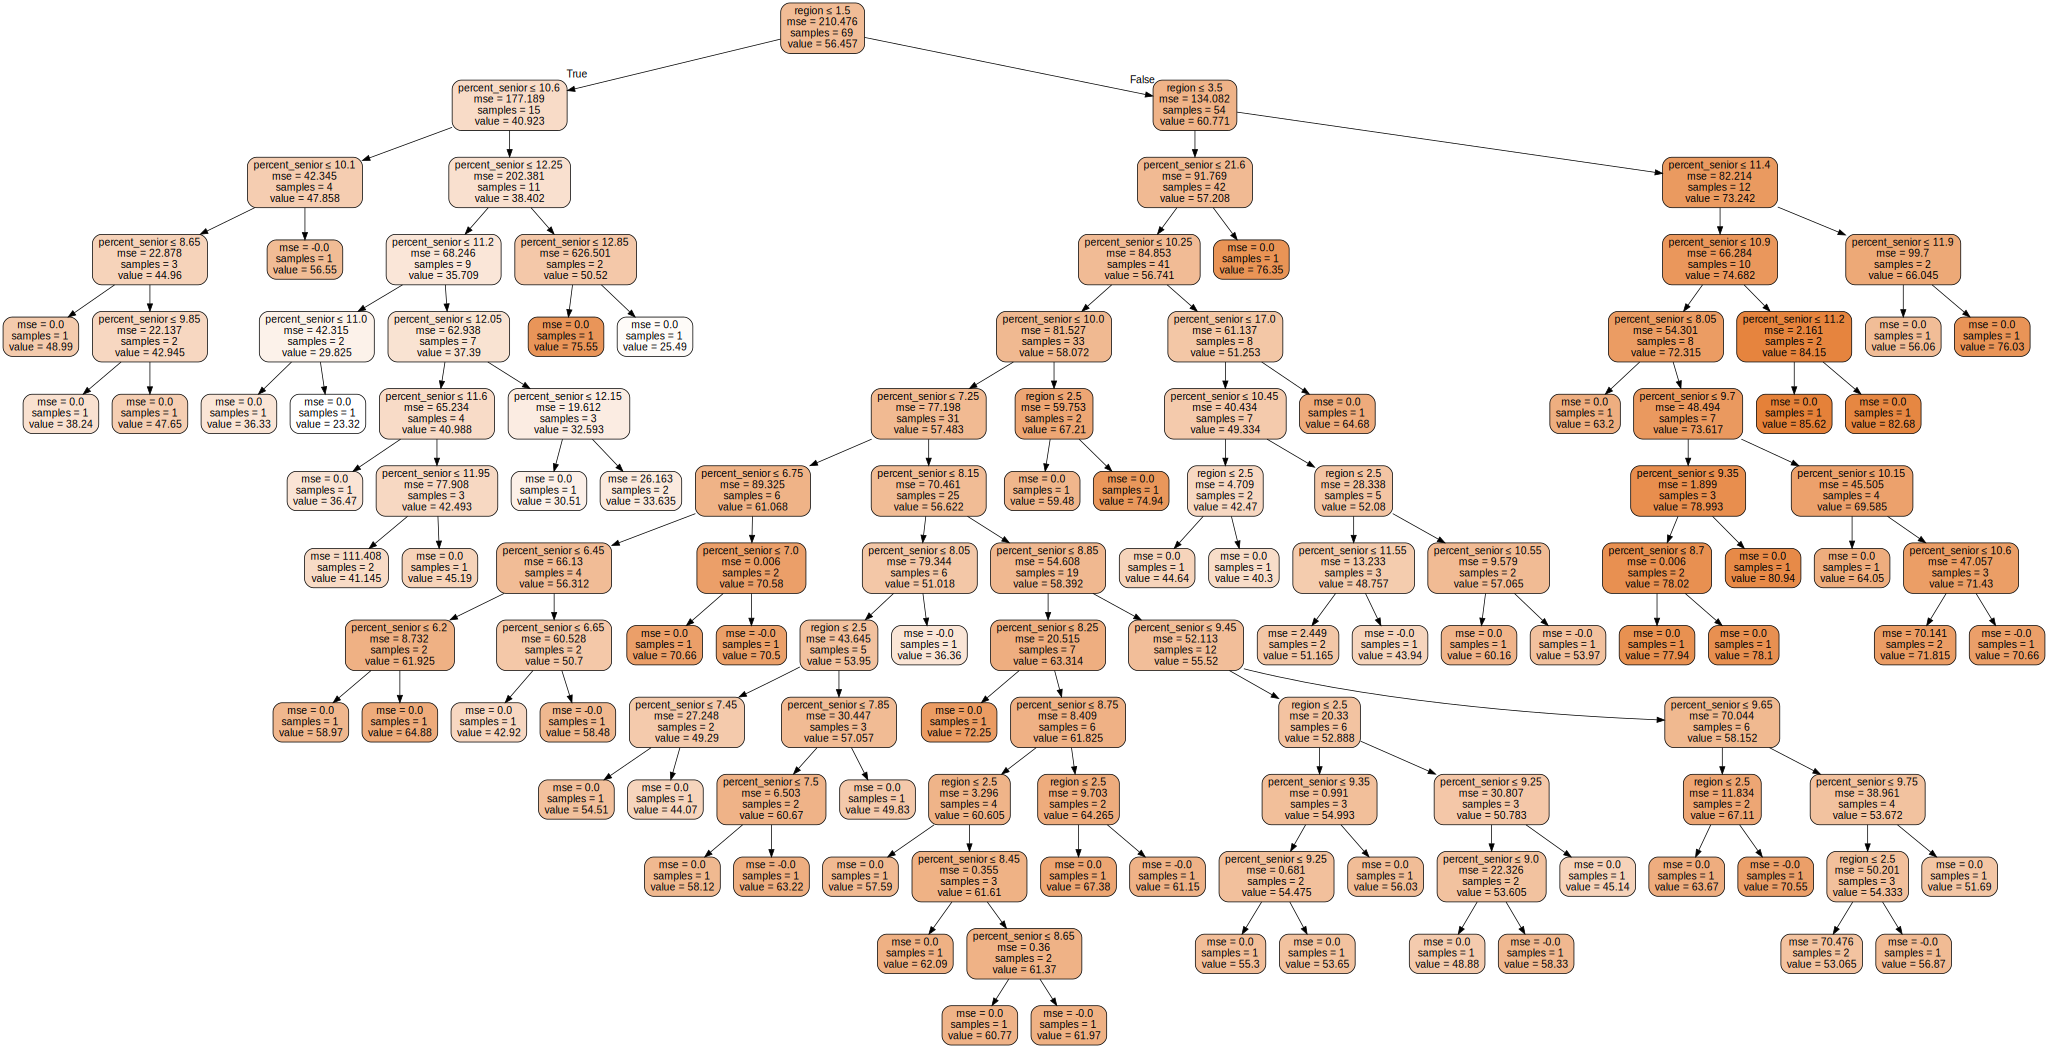

In [18]:
dot_data= export_graphviz(pipe, out_file=None, 
                    feature_names=X_test.columns,   
                      filled=True, rounded=True,  
                      special_characters=True)

graph1=graphviz.Source(dot_data)
graph1

Highlights:

- Verifying the non-existent of missing values is a very important procedure.
- Calculating the summary statistics and the correlation matrix is very important for the modeling procedures.

Improvement opportunities :
- Standardizing the numerical variables is a key step for making all the values to be in the same scale. This procedure might improves a lot your performance metrics.
- The correlation matrix was calculated, but not interpreted, as you can see variables highly correlated. This variables should be managed by interaction methods or dropping one of the variables per correlated pairs.
Identifying relationships with pairplots and distribution plotting is an important step when building a regression model.